In [1]:
import pandas as pd

baseball = pd.read_csv('C:/Users/abern/OneDrive/CIND820/baseball.csv')

baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [2]:
baseball.dtypes

Team             object
League           object
Year              int64
RS                int64
RA                int64
W                 int64
OBP             float64
SLG             float64
BA              float64
Playoffs          int64
RankSeason      float64
RankPlayoffs    float64
G                 int64
OOBP            float64
OSLG            float64
dtype: object

In [3]:
#Add Run Differential (RD) variable
new_col = baseball['RS'] - baseball['RA']
baseball.insert(6, 'RD', new_col)

In [4]:
baseball.head()

,Team,League,Year,RS,RA,W,RD,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,46,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,100,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,7,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,-72,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,-146,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


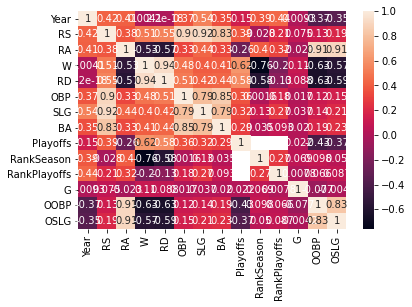

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = baseball.corr()
sn.heatmap(corr_matrix, annot = True)
plt.show()

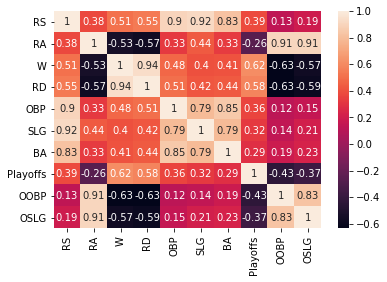

In [6]:
#Drop unneccessary variables
baseball_1 = baseball.drop(['Team', 'League', 'Year', 'RankSeason', 'RankPlayoffs', 'G'], axis = 1)
baseball_1.head()

baseball_1_matrix = baseball_1.corr()
sn.heatmap(baseball_1_matrix, annot = True)
plt.show()

In [7]:
#Begin process of predicting null values in OOBP
data_with_null = baseball_1[['RS', 'RA', 'W', 'RD', 'OBP', 'SLG', 'BA', 'Playoffs', 'OOBP', 'OSLG']]
data_with_null

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,NaN,NaN
1228,706,626,93,80,0.321,0.394,0.268,0,NaN,NaN
1229,878,690,103,188,0.341,0.441,0.278,1,NaN,NaN
1230,774,664,84,110,0.335,0.394,0.271,0,NaN,NaN


In [8]:
data_without_null = data_with_null.dropna()
data_without_null

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
415,872,831,86,41,0.356,0.434,0.271,0,0.345,0.423
416,809,838,75,-29,0.338,0.426,0.262,0,0.355,0.427
417,772,913,69,-141,0.343,0.411,0.274,0,0.371,0.448
418,945,859,95,86,0.361,0.479,0.293,1,0.346,0.459


In [9]:
train_data_x = data_without_null.iloc[:,:8]
train_data_y = data_without_null.iloc[:,8]

In [10]:
train_data_x

,RS,RA,W,RD,OBP,SLG,BA,Playoffs
0,734,688,81,46,0.328,0.418,0.259,0
1,700,600,94,100,0.320,0.389,0.247,1
2,712,705,93,7,0.311,0.417,0.247,1
3,734,806,69,-72,0.315,0.415,0.260,0
4,613,759,61,-146,0.302,0.378,0.240,0
...,...,...,...,...,...,...,...,...
415,872,831,86,41,0.356,0.434,0.271,0
416,809,838,75,-29,0.338,0.426,0.262,0
417,772,913,69,-141,0.343,0.411,0.274,0
418,945,859,95,86,0.361,0.479,0.293,1


In [11]:
train_data_y

0      0.317
1      0.306
2      0.315
3      0.331
4      0.335
       ...  
415    0.345
416    0.355
417    0.371
418    0.346
419    0.353
Name: OOBP, Length: 420, dtype: float64

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data_x, train_data_y)

LinearRegression()

In [13]:
test_data = data_with_null.iloc[:,:8]
test_data['OOBP'] = pd.DataFrame(lr.predict(test_data))
data_with_null.OOBP.fillna(test_data.OOBP, inplace = True)
data_with_null


,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317000,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306000,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315000,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331000,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335000,0.424
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,0.331843,NaN
1228,706,626,93,80,0.321,0.394,0.268,0,0.309736,NaN
1229,878,690,103,188,0.341,0.441,0.278,1,0.317906,NaN
1230,774,664,84,110,0.335,0.394,0.271,0,0.318976,NaN


In [14]:
data_with_null['OOBP'] = data_with_null['OOBP'].round(decimals = 3)
data_with_null

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,0.332,NaN
1228,706,626,93,80,0.321,0.394,0.268,0,0.310,NaN
1229,878,690,103,188,0.341,0.441,0.278,1,0.318,NaN
1230,774,664,84,110,0.335,0.394,0.271,0,0.319,NaN


In [15]:
baseball_2 = data_with_null
baseball_2

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,0.332,NaN
1228,706,626,93,80,0.321,0.394,0.268,0,0.310,NaN
1229,878,690,103,188,0.341,0.441,0.278,1,0.318,NaN
1230,774,664,84,110,0.335,0.394,0.271,0,0.319,NaN


In [16]:
#Begin predicting null values in OSLG
data2_with_null = baseball_2[['RS', 'RA', 'W', 'RD', 'OBP', 'SLG', 'BA', 'Playoffs', 'OOBP', 'OSLG']]
data2_with_null

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,0.332,NaN
1228,706,626,93,80,0.321,0.394,0.268,0,0.310,NaN
1229,878,690,103,188,0.341,0.441,0.278,1,0.318,NaN
1230,774,664,84,110,0.335,0.394,0.271,0,0.319,NaN


In [17]:
data2_without_null = data2_with_null.dropna()
data2_without_null

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
415,872,831,86,41,0.356,0.434,0.271,0,0.345,0.423
416,809,838,75,-29,0.338,0.426,0.262,0,0.355,0.427
417,772,913,69,-141,0.343,0.411,0.274,0,0.371,0.448
418,945,859,95,86,0.361,0.479,0.293,1,0.346,0.459


In [18]:
train2_data_x = data2_without_null.iloc[:,:9]
train2_data_y = data2_without_null.iloc[:,9]

In [19]:
train2_data_x

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP
0,734,688,81,46,0.328,0.418,0.259,0,0.317
1,700,600,94,100,0.320,0.389,0.247,1,0.306
2,712,705,93,7,0.311,0.417,0.247,1,0.315
3,734,806,69,-72,0.315,0.415,0.260,0,0.331
4,613,759,61,-146,0.302,0.378,0.240,0,0.335
...,...,...,...,...,...,...,...,...,...
415,872,831,86,41,0.356,0.434,0.271,0,0.345
416,809,838,75,-29,0.338,0.426,0.262,0,0.355
417,772,913,69,-141,0.343,0.411,0.274,0,0.371
418,945,859,95,86,0.361,0.479,0.293,1,0.346


In [20]:
train2_data_y

0      0.415
1      0.378
2      0.403
3      0.428
4      0.424
       ...  
415    0.423
416    0.427
417    0.448
418    0.459
419    0.456
Name: OSLG, Length: 420, dtype: float64

In [21]:
lr.fit(train2_data_x, train2_data_y)

LinearRegression()

In [22]:
test2_data = data2_with_null.iloc[:,:9]
test2_data['OSLG'] = pd.DataFrame(lr.predict(test2_data))
data2_with_null.OSLG.fillna(test2_data.OSLG, inplace = True)
data2_with_null

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415000
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378000
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403000
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428000
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424000
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,0.332,0.418035
1228,706,626,93,80,0.321,0.394,0.268,0,0.310,0.381398
1229,878,690,103,188,0.341,0.441,0.278,1,0.318,0.401148
1230,774,664,84,110,0.335,0.394,0.271,0,0.319,0.392242


In [23]:
data2_with_null['OSLG'] = data2_with_null['OSLG'].round(decimals = 3)
data2_with_null

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,0.332,0.418
1228,706,626,93,80,0.321,0.394,0.268,0,0.310,0.381
1229,878,690,103,188,0.341,0.441,0.278,1,0.318,0.401
1230,774,664,84,110,0.335,0.394,0.271,0,0.319,0.392


In [24]:
baseball_3 = data2_with_null

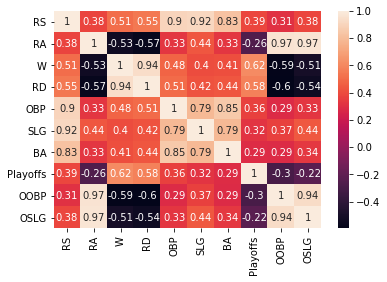

In [25]:
#Correlation matrix with null values predicted
baseball_3_matrix = baseball_3.corr()
sn.heatmap(baseball_3_matrix, annot = True)
plt.show()

In [26]:
#ANOVA feature selection for numeric inputs and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = baseball_3.drop(['Playoffs'], axis = 1)
print(X)

       RS   RA    W   RD    OBP    SLG     BA   OOBP   OSLG
0     734  688   81   46  0.328  0.418  0.259  0.317  0.415
1     700  600   94  100  0.320  0.389  0.247  0.306  0.378
2     712  705   93    7  0.311  0.417  0.247  0.315  0.403
3     734  806   69  -72  0.315  0.415  0.260  0.331  0.428
4     613  759   61 -146  0.302  0.378  0.240  0.335  0.424
...   ...  ...  ...  ...    ...    ...    ...    ...    ...
1227  705  759   81  -54  0.330  0.390  0.260  0.332  0.418
1228  706  626   93   80  0.321  0.394  0.268  0.310  0.381
1229  878  690  103  188  0.341  0.441  0.278  0.318  0.401
1230  774  664   84  110  0.335  0.394  0.271  0.319  0.392
1231  599  716   60 -117  0.308  0.373  0.250  0.329  0.408

[1232 rows x 9 columns]


In [27]:
y = baseball_3['Playoffs']
print(y)

0       0
1       1
2       1
3       0
4       0
       ..
1227    0
1228    0
1229    1
1230    0
1231    0
Name: Playoffs, Length: 1232, dtype: int64


In [28]:
fvalue_Best = SelectKBest(f_classif, k = 5)
X_kbest = fvalue_Best.fit_transform(X, y)
X_kbest = X_kbest.round(decimals = 3)
X_kbest

array([[ 7.34e+02,  8.10e+01,  4.60e+01,  3.28e-01,  4.18e-01],
       [ 7.00e+02,  9.40e+01,  1.00e+02,  3.20e-01,  3.89e-01],
       [ 7.12e+02,  9.30e+01,  7.00e+00,  3.11e-01,  4.17e-01],
       ...,
       [ 8.78e+02,  1.03e+02,  1.88e+02,  3.41e-01,  4.41e-01],
       [ 7.74e+02,  8.40e+01,  1.10e+02,  3.35e-01,  3.94e-01],
       [ 5.99e+02,  6.00e+01, -1.17e+02,  3.08e-01,  3.73e-01]])

In [29]:
category = pd.cut(baseball_3.W, bins = [ 40, 60, 80, 100, 120], labels = ['40-59', '60-79', '80-99', '100-119'])

In [30]:
baseball_3.insert(loc = 8, column = 'Category', value = category)

In [33]:
baseball_3

,RS,RA,W,RD,OBP,SLG,BA,Playoffs,Category,OOBP,OSLG
0,734,688,81,46,0.328,0.418,0.259,0,80-99,0.317,0.415
1,700,600,94,100,0.320,0.389,0.247,1,80-99,0.306,0.378
2,712,705,93,7,0.311,0.417,0.247,1,80-99,0.315,0.403
3,734,806,69,-72,0.315,0.415,0.260,0,60-79,0.331,0.428
4,613,759,61,-146,0.302,0.378,0.240,0,60-79,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,-54,0.330,0.390,0.260,0,80-99,0.332,0.418
1228,706,626,93,80,0.321,0.394,0.268,0,80-99,0.310,0.381
1229,878,690,103,188,0.341,0.441,0.278,1,100-119,0.318,0.401
1230,774,664,84,110,0.335,0.394,0.271,0,80-99,0.319,0.392


In [32]:
baseball_3.dtypes

RS             int64
RA             int64
W              int64
RD             int64
OBP          float64
SLG          float64
BA           float64
Playoffs       int64
Category    category
OOBP         float64
OSLG         float64
dtype: object

Text(0.5, 1.0, 'Opponents Slugging %')

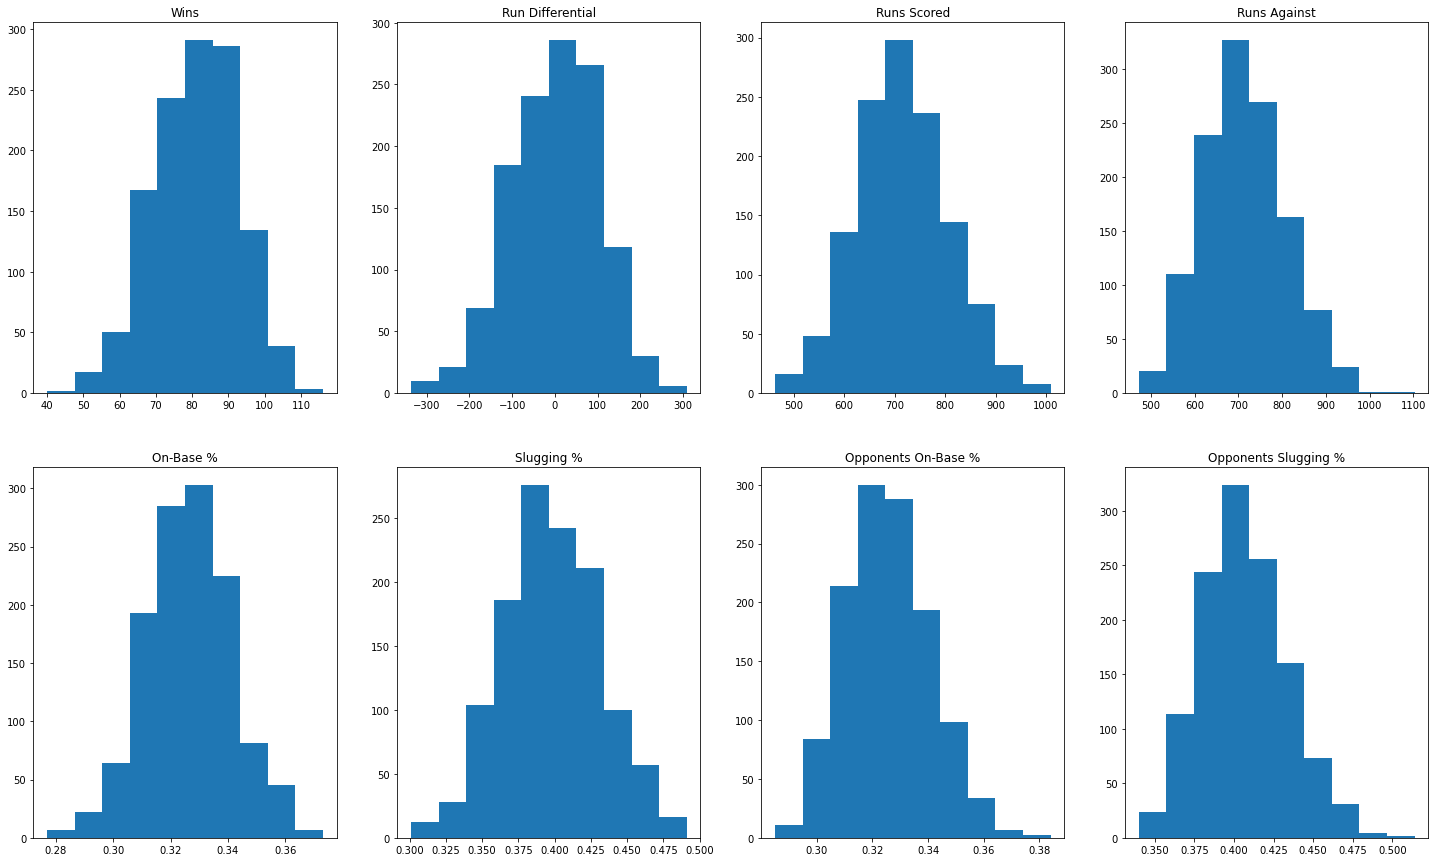

In [33]:
#Histograms of Variables
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,4, figsize = (25, 15))

ax[0,0].hist(baseball_3['W'])
ax[0,0].set_title("Wins")

ax[0,1].hist(baseball_3['RD'])
ax[0,1].set_title("Run Differential")

ax[0,2].hist(baseball_3['RS'])
ax[0,2].set_title("Runs Scored")

ax[0,3].hist(baseball_3['RA'])
ax[0,3].set_title("Runs Against")

ax[1,0].hist(baseball_3['OBP'])
ax[1,0].set_title("On-Base %")

ax[1,1].hist(baseball_3['SLG'])
ax[1,1].set_title("Slugging %")

ax[1,2].hist(baseball_3['OOBP'])
ax[1,2].set_title("Opponents On-Base %")

ax[1,3].hist(baseball_3['OSLG'])
ax[1,3].set_title("Opponents Slugging %")

In [31]:
#Perform Shapiro-Wilk Test to test if dataset is normally distributed

from scipy.stats import shapiro
from numpy.random import randn

shapiro(baseball_3.drop('Category', 1))

C:\Users\abern\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6179234981536865, pvalue=0.0)

<AxesSubplot:xlabel='W', ylabel='Playoffs'>

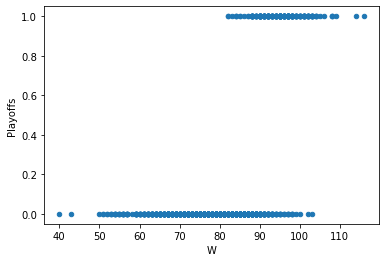

In [35]:
#Plot for Wins versus Playoffs
#0 = Did not make the playoffs.
#1 = Made the playoffs.
baseball_3.plot(kind = 'scatter', x = 'W', y = 'Playoffs')

Text(0.5, 1.0, 'Wins vs. OSLG')

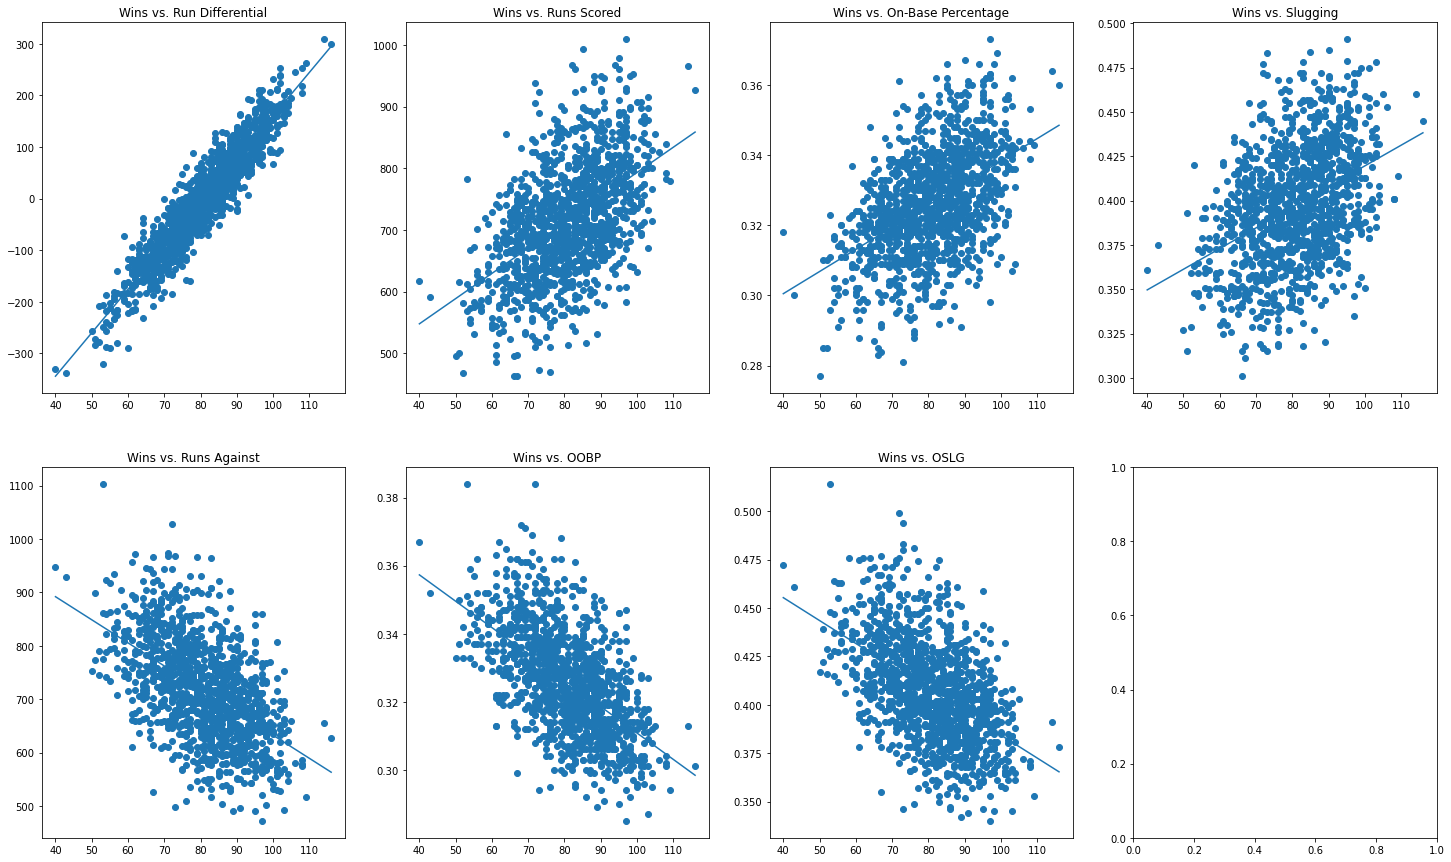

In [36]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(2,4, figsize = (25, 15))

Wins = baseball_3['W']
RD = baseball_3['RD']
RS = baseball_3['RS']
OBP = baseball_3['OBP']
SLG = baseball_3['SLG']
RA = baseball_3['RA']
OOBP = baseball_3['OOBP']
OSLG = baseball_3['OSLG']


ax[0,0].scatter(Wins, RD)
ax[0,0].set_title("Wins vs. Run Differential")
ax[0,0].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, RD, 1))(np.unique(Wins)))

ax[0,1].scatter(Wins, RS)
ax[0,1].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, RS, 1))(np.unique(Wins)))
ax[0,1].set_title("Wins vs. Runs Scored")

ax[0,2].scatter(Wins, OBP)
ax[0,2].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, OBP, 1))(np.unique(Wins)))
ax[0,2].set_title("Wins vs. On-Base Percentage")

ax[0,3].scatter(Wins, SLG)
ax[0,3].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, SLG, 1))(np.unique(Wins)))
ax[0,3].set_title("Wins vs. Slugging")

ax[1,0].scatter(Wins, RA)
ax[1,0].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, RA, 1))(np.unique(Wins)))
ax[1,0].set_title("Wins vs. Runs Against")

ax[1,1].scatter(Wins, OOBP)
ax[1,1].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, OOBP, 1))(np.unique(Wins)))
ax[1,1].set_title("Wins vs. OOBP")

ax[1,2].scatter(Wins, OSLG)
ax[1,2].plot(np.unique(Wins), np.poly1d(np.polyfit(Wins, OSLG, 1))(np.unique(Wins)))
ax[1,2].set_title("Wins vs. OSLG")